In [1]:
from src.utils import create_square, plot_function, plot_vector_field
from src.models.dynamics_models import BidomainModel
from src.models.cell_models import *
from typing import Callable
import numpy as np
import ufl

In [2]:
domain = create_square(32, 32)
cell_model = BeelerReuter(domain=domain)


class Model(BidomainModel):
    def initial_V_m(self) -> tuple[Callable, float, float]:
        return lambda x: x[0] ** 2 + x[1] ** 2 < 0.2**2, 0, -84

    # def ischemia(self):
    #    return (
    #        lambda x: (x[0] - 0.5) ** 2 + (x[1] - 0.5) ** 2 < 0.5**2,
    #        self.M_i / 10,
    #        self.M_e / 10,
    #    )


model = Model(domain)

### Solve the equations with given parameters

In [3]:
model.solve(
    T=50,
    steps=500,
    cell_model=cell_model,
    gif_name="demo.gif",
    signal_point=[0.2, 0.2, 0.0],
)

Solving problem:   0%|          | 0/500 [00:00<?, ?it/s]WARNING:py.warnings:/home/drvinko/Desktop/Modeliranje-biofizike-srcanog-tkiva/src/models/cell_models.py:239: RuntimeWarning: overflow encountered in exp
  return (C1 * np.exp(C2 * (V - v0)) + C3 * (V - v0)) / (

  return v + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

  blueprint(0.012, -125.0, 0.0, 1.0, 0.15, -28.0) * (1 - f)

Solving problem:   0%|          | 1/500 [00:00<02:01,  4.11it/s]WARNING:py.warnings:/home/drvinko/Desktop/Modeliranje-biofizike-srcanog-tkiva/src/models/cell_models.py:231: RuntimeWarning: invalid value encountered in log
  I_s = 0.09 * f * d * (V + 66.18 + 13.0287 * (np.log(c) - 7 * np.log(10)))

Solving problem: 100%|██████████| 500/500 [00:39<00:00, 12.63it/s]


### Plotting a final plot of transmembrane potential

In [4]:
plot_function(model.V_m_n, 'V_m')

Widget(value='<iframe src="http://localhost:39969/index.html?ui=P_0x7ff4fc8aa2d0_0&reconnect=auto" class="pyvi…

### Plotting a transmembrane potential in a given signal point

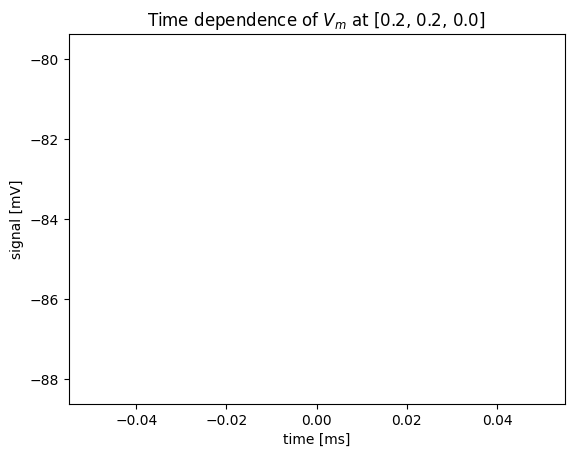

In [5]:
model.plot_signal()

### Plotting a transmembrane potential solution of a cell model

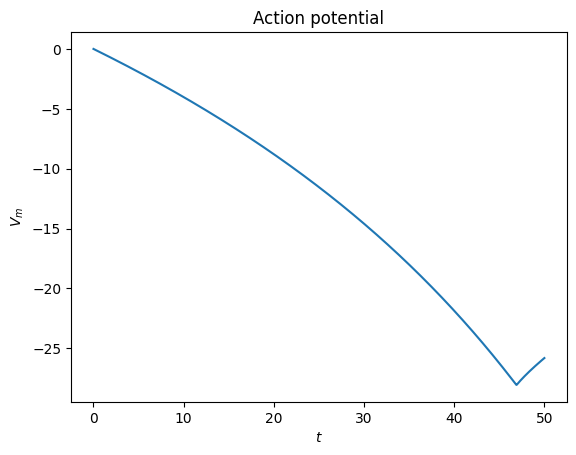

In [6]:
cell_model.visualize(50, 0, 0.01, 0.0, 0.5)

In [7]:
plot_vector_field(domain, lambda x: [x[0], x[0], 0])

Widget(value='<iframe src="http://localhost:39969/index.html?ui=P_0x7ff4e41a9350_1&reconnect=auto" class="pyvi…